# SIT742: Modern Data Science 
**(2021 Assessment Task 02 - Data Analytics)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- It is a group assignment, and please form a group and self-enrol into the CloudDeakin groups.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 21/05/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your group information in the following cell.   
</div>

**Student Information:** Please fill your group information below

- Group ID: Task2G3M 155
- Names:  UMER SANDHU, USMAN TARIQ, MOHAMMED ZAID KHAN
- Student IDs: 219129134, 219251039, 219361458
- Emails:  csandhu@deakin.edu.au, tariqus@deakin.edu.au, mzkh@deakin.edu.au
- Lab Session and Tutor (for on campus students): 

---


# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages. 

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not restricted to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## 1.Data ETL

### 1.1 Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from zipfile import ZipFile
from ipywidgets import IntProgress
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
def get_data(txt):
    rows = []                                 #To store data after spliting
    for line in txt:
        data = line.split()
        if (len(data) == 15):
            rows.append(data)
    return rows

In [ ]:
txt=[]                                      # To store text strings extracted from the weblog file
with ZipFile("HTWebLog_p1.zip") as zipfiles:
    filelist = zipfiles.namelist()
    print("Number of files:", np.shape(filelist)[0])
    for f in filelist:
        df = pd.read_csv(zipfiles.open(f), encoding='iso-8859-1', delimiter ="\t", skiprows=4)
        df.columns = ["data"]
        txt.extend(df["data"])

Number of files: 120


In [ ]:
#Get Split data
rows = get_data(txt)

In [ ]:
#Save data in dataframe
ColumnNames=['date','time','s-sitename','s-ip','cs-method','cs-uri-stem','cs-uri-query','s-port','cs-username',
             'c-ip','cs(User-Agent)','cs(Referer)','sc-status','sc-substatus','sc-win32-status'] 
df_data = pd.DataFrame(rows, columns = ColumnNames)
#Changing datatype for date and time
df_data['date'] = pd.to_datetime(df_data['date'], format='%Y-%m-%d')
df_data['time'] = pd.to_datetime(df_data['time'],format= '%H:%M:%S' )
print("Number of records in web_log:",len(df_data))
df_data.head()

Number of records in web_log: 8438806


,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,1900-01-01 00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200,0,0
1,2006-11-01,1900-01-01 00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
2,2006-11-01,1900-01-01 00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
3,2006-11-01,1900-01-01 00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
4,2006-11-01,1900-01-01 00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_logo.gif,-,80,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0


In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification. 

**Code**: 
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [ ]:
#Your code to remove missing values as required.
# As Nan in data is represented by "-""
# Checking number of NaNs and dropping columns with NaNs > 15%
for column in ColumnNames:
#     print (column)
    if (len(df_data[df_data[column]=='-'])) > 0:
        frac = float(len(df_data[df_data[column]=='-']))/float(len(df_data))
        print( column, (len(df_data[df_data[column]=='-'])), "{0:.0%}".format(frac))
        if frac >= 0.15:
            if column != 'cs(Referer)':
                df_data.drop(column, axis=1, inplace=True)

cs-uri-query 7886425 93%
cs-username 8438806 100%
cs(User-Agent) 3527 0%
cs(Referer) 1308918 16%


In [ ]:
# Removing Rows with NaNs
df_data = df_data[df_data != '-']
df_data.dropna(inplace=True)

print(len(df_data))

7129841


In [ ]:
# only 30% of total data are selected for classification
weblog_df = df_data.sample(frac = 0.3, random_state=1)
weblog_df.reset_index(inplace = True)

#Your code to show the number of requests in weblog_df
print("Number of requests:",np.shape(weblog_df)[0])


Number of requests: 2138952


### 1.2 Feature Selection

**Code**: 
    You are required to select *'cs_method'*,*'cs_ip'*,*'cs_uri_stem'*,*'cs(Referer)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks. 

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [ ]:
# Your code for feature selection
ml_df = weblog_df[['cs-method', 'c-ip', 'cs-uri-stem', 'cs(Referer)','sc-status']]
# ml_df.to_csv('ml_data.csv', index = False)

#Your code to show the top 5 rows of ml_df
ml_df.head(5)

,cs-method,c-ip,cs-uri-stem,cs(Referer),sc-status
0,GET,61.15.94.164,/Tulip/common/zh-hk/images/sectionbanner_dinin...,http://www.hotelTulip.com.hk/Tulip/whatsnew/wh...,200
1,GET,210.17.168.249,/Tulip/dining/zh-hk/images/btn_reserveATable.gif,http://www.hotelTulip.com.hk/Tulip/whatsnew/wh...,200
2,GET,59.188.33.66,/Tulip/common/en-us/images/sectionbanner_about...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,304
3,GET,59.188.33.37,/Tulip/common/en-us/images/sectionbanner_recru...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200
4,GET,219.79.107.203,/Tulip/common/images/trans.gif,http://www.hotelTulip.com.hk/Tulip/recruitment...,200


In [ ]:
# display data description
ml_df.describe()

,cs-method,c-ip,cs-uri-stem,cs(Referer),sc-status
count,2138952,2138952,2138952,2138952,2138952
unique,3,58254,2316,24408,9
top,GET,59.188.33.66,/Tulip/common/common_style.aspx,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200
freq,2135502,25126,118813,485941,1571465


## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**: 
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;
    2. Plot in the elbow plot. 
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:
# le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)
# print(le_df.head(7))

#Separating feature and label, and spliting in test/train data
y = le_df['sc-status']
X = le_df.drop(columns = 'sc-status')
X_train, X_test,y_train,y_test =  train_test_split(X,y,test_size=0.30,random_state=70)


for k in range(2,11):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X_train)
    score = accuracy_score(y_test,k_means.predict(X_test))
    print("K = ",k,', Accuracy:{0:f}'.format(score))

K =  2 , Accuracy:0.419944
K =  3 , Accuracy:0.220812
K =  4 , Accuracy:0.200310
K =  5 , Accuracy:0.204351
K =  6 , Accuracy:0.221138
K =  7 , Accuracy:0.131089
K =  8 , Accuracy:0.146734
K =  9 , Accuracy:0.112867
K =  10 , Accuracy:0.140552


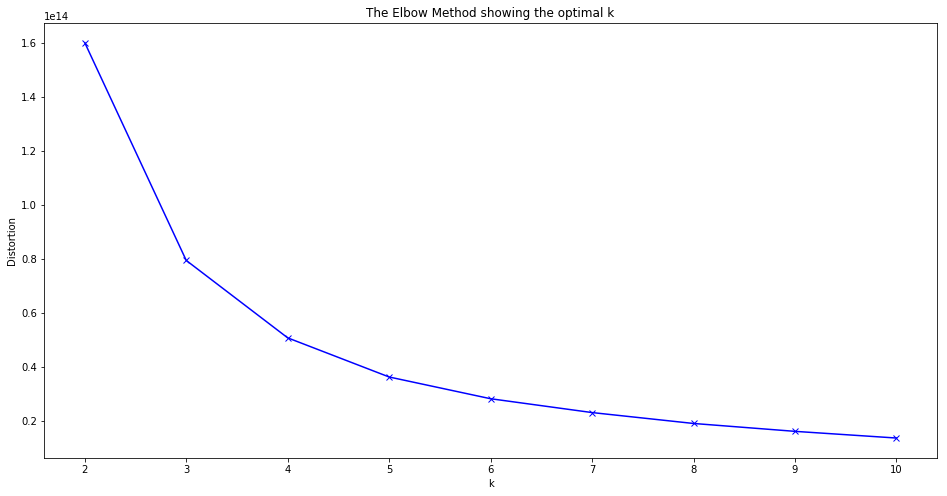

In [ ]:
#Your code for Kmeans

distortions = []
K = range(2,11)
for k in K:
#     print(k)
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(le_df)
    distortions.append(kmeanModel.inertia_)
    
#Your code for visualizing K means result as elbow plot.

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [ ]:
# import io
# import pandas as pd
# ml_df = pd.read_csv(io.BytesIO(uploaded['ml_data.csv']))
# ml_df.rename(columns={'sc-status': 'label'},  inplace=True)

# le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.1.1
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark 
findspark.init() 

In [ ]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import *

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

### 3.1 Data Preparation 

In order to reduce the processing time, we will select 10% of le_df.

In [ ]:
schema = StructType([StructField("label", IntegerType(), True),
                     StructField("cs-method", IntegerType(), True),
                     StructField("c-ip", IntegerType(), True),
                     StructField("cs-uri-stem", IntegerType(), True),
                     StructField("cs(Referer)", IntegerType(), True)])

lr_df = spark.createDataFrame(le_df, schema)

In [ ]:
#Only 10% of the data is used in this part.

lr_df = le_df.sample(frac=0.1, random_state=1)

In [ ]:
from pyspark.sql import SQLContext
from pyspark import SparkConf, SparkContext
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

lr_df = sqlContext.createDataFrame(lr_df)

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['cs-method', 'c-ip', 'cs-uri-stem', 'cs(Referer)'],outputCol="features")
df_temp = vector_assembler.transform(lr_df )
df_temp.show(3)

+---------+-----+-----------+-----------+-----+--------------------+
|cs-method| c-ip|cs-uri-stem|cs(Referer)|label|            features|
+---------+-----+-----------+-----------+-----+--------------------+
|        0|30423|       1908|      23876|    4|[0.0,30423.0,1908...|
|        0|57101|       1235|      23635|    0|[0.0,57101.0,1235...|
|        0|13517|       1635|      23596|    4|[0.0,13517.0,1635...|
+---------+-----+-----------+-----------+-----+--------------------+
only showing top 3 rows



In [ ]:
df_lr = df_temp.drop('cs-method', 'c-ip', 'cs-uri-stem', 'cs(Referer)')
df_lr.show(3)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    4|[0.0,30423.0,1908...|
|    0|[0.0,57101.0,1235...|
|    4|[0.0,13517.0,1635...|
+-----+--------------------+
only showing top 3 rows



###  3.2 Logistic Regression

 <div class="alert alert-block alert-info">

**Code**: 
    1. Perform supervised learning on ml\_df with Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [ ]:
#Create the data sets for training and testing
(trainingData, testData) = df_lr.randomSplit([0.7, 0.3])

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from pyspark.ml.classification import LogisticRegression

# Your code contains trainning from train data and predicting based on the test data

lr = LogisticRegression(featuresCol = 'features', labelCol = 'sc-status', maxIter=50)
lrModel = lr.fit(trainingData)

print("Coefficients: " + str(lrModel.coefficientMatrix ))
print("Intercept: " + str(lrModel.interceptVector ))

Coefficients: DenseMatrix([[ 2.03305677e+00,  1.05914573e-06, -2.61774825e-04,
               8.43303766e-05],
             [-3.82369874e+00,  1.60005012e-05,  6.87158448e-04,
               7.90392713e-06],
             [-6.53536472e-02,  1.89968878e-06, -7.67088474e-05,
               8.61857517e-06],
             [ 8.63567908e+00, -1.45118631e-05, -1.38753053e-03,
              -2.20843653e-05],
             [-9.11379637e+00,  4.10760386e-06, -4.39283715e-04,
               5.98101277e-05],
             [ 6.76353410e+00, -1.94789751e-06, -2.15503450e-05,
              -2.59899497e-05],
             [-4.41766740e-02, -2.71900276e-08,  2.36135973e-05,
               1.93693953e-06],
             [-1.26695438e+01, -9.11803460e-06,  2.02338772e-03,
              -1.97439015e-05],
             [ 8.28429930e+00,  2.53804567e-06, -5.47311503e-04,
              -9.47817295e-05]])
Intercept: [6.72379082458658,-0.033392658029387366,-3.8896838077767906,-0.040719001376263546,6.421261514460642,-

In [ ]:
predictions = lrModel.transform(testData)
predictions.show(10)
trainingSummary = lrModel.summary
y_true = predictions.select(['sc-status']).collect()
y_pred = predictions.select(['prediction']).collect()

+---------+--------------------+--------------------+--------------------+----------+
|sc-status|            features|       rawPrediction|         probability|prediction|
+---------+--------------------+--------------------+--------------------+----------+
|        0|[0.0,0.0,1245.0,2...|[8.32702286229783...|[0.74489887660397...|       0.0|
|        0|[0.0,3.0,1211.0,2...|[8.39428300436353...|[0.74725912791923...|       0.0|
|        0|[0.0,4.0,1449.0,2...|[8.26864954242177...|[0.75003196371123...|       0.0|
|        0|[0.0,4.0,1747.0,2...|[8.25962289269416...|[0.76028473128780...|       0.0|
|        0|[0.0,15.0,1270.0,...|[8.33938438321828...|[0.74667675280251...|       0.0|
|        0|[0.0,15.0,1272.0,...|[8.32115145448859...|[0.74571711738672...|       0.0|
|        0|[0.0,15.0,1444.0,...|[8.35742066765427...|[0.75492254812300...|       0.0|
|        0|[0.0,17.0,1200.0,...|[8.33882073488727...|[0.74360113422821...|       0.0|
|        0|[0.0,17.0,1272.0,...|[8.31997294750803...|[

[[46889    43     3     3 16825   282     0]
 [    0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0]
 [   14     0     0    59     0     0     1]
 [    0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0]]


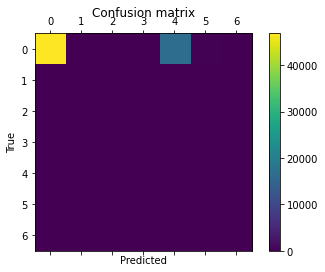

In [ ]:
# Your code to display TP, TN, FP, FN
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_true)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Your Code to display the classification results as required.
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85     46903
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00         3
           3       0.80      0.95      0.87        62
           4       0.00      0.00      0.00     16825
           7       0.00      0.00      0.00       282
           8       0.00      0.00      0.00         1

    accuracy                           0.73     64119
   macro avg       0.22      0.28      0.24     64119
weighted avg       0.54      0.73      0.62     64119



### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**: 
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [ ]:
# tData = trainingData
# tData = tData.selectExpr("'sc-status' as label", "features as features")
trainingData.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[0.0,0.0,1050.0,2...|
|    0|[0.0,0.0,1245.0,2...|
|    0|[0.0,0.0,1245.0,2...|
|    0|[0.0,3.0,1270.0,2...|
|    0|[0.0,5.0,1246.0,2...|
|    0|[0.0,7.0,1045.0,2...|
|    0|[0.0,7.0,1247.0,2...|
|    0|[0.0,14.0,1273.0,...|
|    0|[0.0,15.0,1233.0,...|
|    0|[0.0,15.0,1444.0,...|
|    0|[0.0,15.0,2032.0,...|
|    0|[0.0,16.0,1040.0,...|
|    0|[0.0,17.0,1234.0,...|
|    0|[0.0,17.0,1272.0,...|
|    0|[0.0,19.0,1238.0,...|
|    0|[0.0,19.0,1478.0,...|
|    0|[0.0,21.0,1285.0,...|
|    0|[0.0,21.0,1663.0,...|
|    0|[0.0,22.0,1248.0,...|
|    0|[0.0,23.0,1200.0,...|
+-----+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier,LogisticRegression,DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import numpy as np


In [ ]:
# K = 2
# Your code for 2-fold cross validation

#Models
# Random Forest, Logistic Regression
rf = RandomForestClassifier(featuresCol = 'features')
lr = LogisticRegression(featuresCol = 'features')
dt = DecisionTreeClassifier(featuresCol = 'features')

# Pipelines
pipeline_rf = Pipeline(stages=[vector_assembler, rf])
pipeline_lr = Pipeline(stages=[vector_assembler, lr])
pipeline_dt = Pipeline(stages=[vector_assembler, dt])

#ParamGrids
paramGrid_rf = ParamGridBuilder() \
    .addGrid(rf.numTrees, [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]) \
    .addGrid(rf.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 25, num = 3)]) \
    .build()

paramGrid_lr = ParamGridBuilder()\
    .addGrid(lr.aggregationDepth,[2,5,10])\
    .addGrid(lr.elasticNetParam,[0.0, 0.5, 1.0])\
    .addGrid(lr.fitIntercept,[False, True])\
    .addGrid(lr.maxIter,[10, 15, 30])\
    .addGrid(lr.regParam,[0.01, 0.5, 2.0]) \
    .build()

paramGrid_dt =   (ParamGridBuilder()
             .addGrid(dt.maxDepth, [5, 10, 20])
             .addGrid(dt.maxBins, [10, 20, 40])
             .build())

#CrossVals
crossval_rf = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid_rf,
                          evaluator=MulticlassClassificationEvaluator(),
                          numFolds=2)

crossval_lr = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid_lr,
                          evaluator=MulticlassClassificationEvaluator(),
                          numFolds=2)

crossval_df = CrossValidator(estimator = dt,
                      estimatorParamMaps = paramGrid_dt,
                      evaluator = MulticlassClassificationEvaluator(),
                      numFolds = 2)

#Prediction Models
cvModel_rf = crossval_rf.fit(trainingData)
cvModel_lr = crossval_lr.fit(trainingData)
cvModel_dt = crossval_df.fit(trainingData)

In [ ]:
#Predictions
predictions_rf = cvModel_rf.transform(testData)
predictions_lr = cvModel_lr.transform(testData)
predictions_dt = cvModel_dt.transform(testData)

# Best parameters
bestPipeline_rf = cvModel_rf.bestModel
bestPipeline_lr = cvModel_lr.bestModel
bestPipeline_dt = cvModel_dt.bestModel
# Best Parameters
print("Random Forest Parameters")
print('numTrees - ', bestPipeline_rf.getNumTrees)
print('maxDepth - ', bestPipeline_rf.getOrDefault('maxDepth'))
print("\n")
print("Decision Tree Parameters")
print('maxDepth - ', bestPipeline_dt.getOrDefault('maxDepth'))
print('maxBins - ', bestPipeline_dt.getOrDefault('maxBins'))
print("\n")
print("Logistic Regression Parameters")
print('aggregationDepth - ', bestPipeline_lr.getOrDefault('aggregationDepth'))
print('fitIntercept - ', bestPipeline_lr.getOrDefault('fitIntercept'))
print('maxIter - ', bestPipeline_lr.getOrDefault('maxIter'))
print('regParam - ', bestPipeline_lr.getOrDefault('regParam'))

Random Forest Parameters
numTrees -  50
maxDepth -  25


Decision Tree Parameters
maxDepth -  10
maxBins -  40


Logistic Regression Parameters
aggregationDepth -  2
fitIntercept -  True
maxIter -  10
regParam -  0.01


## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**: 
Implement association rule mining with a suitable threshold for support, and confidence 
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=fd82f92cac62069f9a63a29c2182b24997ab8efe376f2d08c012389c3fd7e691
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
weblog_df2 = df_data.sample(frac = 0.1, random_state=1)
# weblog_df2.columns

In [ ]:
# you can also use PySpark package, if preferred
from apyori import apriori

# Selecting 10% data for ARM and 6 features
weblog_df = df_data.sample(frac = 0.1, random_state=1)
arm_df = weblog_df[['cs-method','cs-uri-stem','c-ip','cs(User-Agent)','cs(Referer)','sc-status','sc-win32-status']]

# Your code
results = arm_df.values.tolist()
association_rules = apriori(results, min_support=0.085, min_confidence=0.4, min_lift=1, min_length=3)
association_results = list(association_rules)
print(len(association_results))


28


In [ ]:
import itertools

# Sorting by Support and Confidence using a Dataframe
df = pd.DataFrame(columns=('Items','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

df['Items'] = list(map(set, Items))                                   
df['Support'] = Support
df['Confidence'] = Confidence
df['Lift']= Lift

df.sort_values(["Support", "Confidence"], ascending = (False, True), inplace = True)
df.reset_index(inplace=True)

# Storing in a list and removing duplicates
items = []
for x in df['Items'].to_list():
    if (len(list(x))) > 2:
        items.append(list(x))

items.sort()
items = list(items for items,_ in itertools.groupby(items))
items = items[:6]
items
#Selecting top 5 rules with

[['304', 'GET', '0'],
 ['GET', '0', '200'],
 ['GET', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1)', '0'],
 ['GET',
  'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1)',
  '0',
  '200'],
 ['GET', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1)', '200'],
 ['GET',
  'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+.NET+CLR+1.1.4322)',
  '0']]



```
`# This is formatted as code`
```

## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
 !pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from collections import defaultdict

import itertools

     |████████████████████████████████| 911kB 7.6MB/s 
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [56.8 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic In

In [ ]:
from selenium.common.exceptions import TimeoutException,StaleElementReferenceException
def get_citations(url):
    """Get Citation deatils from Google Scholar"""
    driver = webdriver.Chrome('chromedriver',options=chrome_options)
    driver.get(url)
    page_soup = BeautifulSoup(driver.page_source,'lxml');
    tbl_id = "gsc_a_t"
    div_id = "gsc_md_hist_b"
    div = page_soup.find("div",{"class":div_id})

    year = [year.text for year in div.find_all('span','gsc_g_t')]
    citations = [cit.text for cit in div.find_all('span','gsc_g_al')]
    
            
    
    return year,citations

year, cit = get_citations('https://scholar.google.com/citations?hl=en&user=dqwjm-0AAAAJ')
year, cit

(['2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021'],
 ['15',
  '34',
  '17',
  '11',
  '33',
  '41',
  '57',
  '68',
  '106',
  '129',
  '172',
  '251',
  '289',
  '339',
  '386',
  '451',
  '579',
  '835',
  '310'])

In [ ]:
# Your code to crawl and generate the csv, and save it to variable create_df
#import pandas as pd
create_df = pd.DataFrame()
create_df['year'] = year
create_df['citation'] = cit
create_df.to_csv('Citation2003-2021.csv')
citations = create_df
create_df

,year,citation
0,2003,15
1,2004,34
2,2005,17
3,2006,11
4,2007,33
5,2008,41
6,2009,57
7,2010,68
8,2011,106
9,2012,129


## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
import pandas as pd
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
# pd.options.plotting.backend = "plotly"
import warnings

In [ ]:
# your code to use create_df to split the data into train (year 2003 to 2017) and test
Train_df = create_df.loc[create_df['year'] <= '2017']
Test_df = create_df.loc[(create_df['year'] > '2017') & (create_df['year'] < '2021')]

model = ARIMA(Train_df.citation, order=(1,1,1))
model_fit = model.fit(start_ar_lags=3)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:             D.citation   No. Observations:                   14
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -61.582
Method:                       css-mle   S.D. of innovations             19.354
Date:                Sun, 16 May 2021   AIC                            131.164
Time:                        14:30:56   BIC                            133.720
Sample:                             1   HQIC                           130.927
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               27.0010     13.465      2.005      0.070       0.609      53.393
ar.L1.D.citation     0.8058      0.239      3.377      0.006       0.338       1.273
ma.L1.D.citation    -0.3805 

['ye### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
import matplotlib.pyplot as plt
fc, se, conf = model_fit.forecast(3, alpha=0.05)
# Test_df['Forecast'] = fc
# Output = pd.merge(create_df,Test_df,how='left',on='year').head(-1).rename(columns={'citation_x': 'Actual'})
# Output.plot(x='year',y=['Actual','Forecast'],kind='line')

Train_df.set_index('year',inplace=True)
Test_df.set_index('year',inplace=True)


In [ ]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Your code to show the performance RMSE
def forecast_accuracy(forecast, actual):

    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
    return rmse

print ('RMSE ->',forecast_accuracy(fc, Test_df.citation))

RMSE -> 203.53307361176672


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

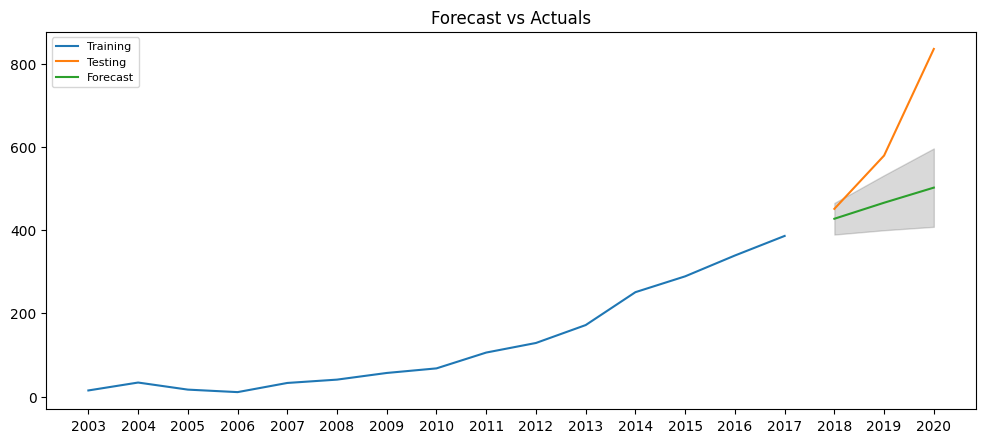

In [ ]:
# You code: Visualize as required, the prediction with its confidence interval
fc_series = pd.Series(fc, index=Test_df.index)
lower_series = pd.Series(conf[:, 0], index=Test_df.index)
upper_series = pd.Series(conf[:, 1], index=Test_df.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train_df.citation, label='Training')
plt.plot(Test_df.citation, label='Testing')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to run grid search
p = list(range(1,3))
q = list(range(1,3))
d = list(range(1,3))
RMSE = []
PARAMETER = []

def evaluate_arima_model(Train_df, Test_df, arima_order):
  model = ARIMA(Train_df.citation, order=arima_order)
  model_fit = model.fit(start_ar_lags=3)
  fc, se, conf = model_fit.forecast(3, alpha=0.05)
  fc_series = pd.Series(fc, index=Test_df.index)
  rmse = np.mean((fc_series - Test_df.citation)**2)**.5
  return rmse

def evaluate_models(Train_df, Test_df, p_values, d_values, q_values):
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(Train_df, Test_df, order)
          RMSE.append(rmse)
          PARAMETER.append(order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          # print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
          continue
  # print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
  return best_cfg  

warnings.filterwarnings("ignore")
best_cfg = evaluate_models(Train_df, Test_df, p, d, q)

In [ ]:
# your code to generate the seach-results.csv and print the top 6 rows
Results = pd.DataFrame({'RMSE':RMSE,'Parameter':PARAMETER})
Results.to_csv('Search_results.csv')
Results.head(6)

,RMSE,Parameter
0,203.533074,"(1, 1, 1)"
1,205.813224,"(1, 1, 2)"
2,143.258927,"(1, 2, 1)"
3,129.407931,"(1, 2, 2)"
4,213.522045,"(2, 1, 1)"
5,227.328358,"(2, 1, 2)"


### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to perform the Arima train on data 2003 to 2020
#train = create_df.citation_all.values[:-1]
Train_df = create_df.loc[create_df['year'] <= '2020']
Train_df.set_index('year',inplace=True)

model = ARIMA(Train_df.citation, order= best_cfg)
model_fit = model.fit(start_ar_lags=3)

# Your code to predict for 2021 and 2022

fc, se, conf = model_fit.forecast(2, alpha=0.05)

<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

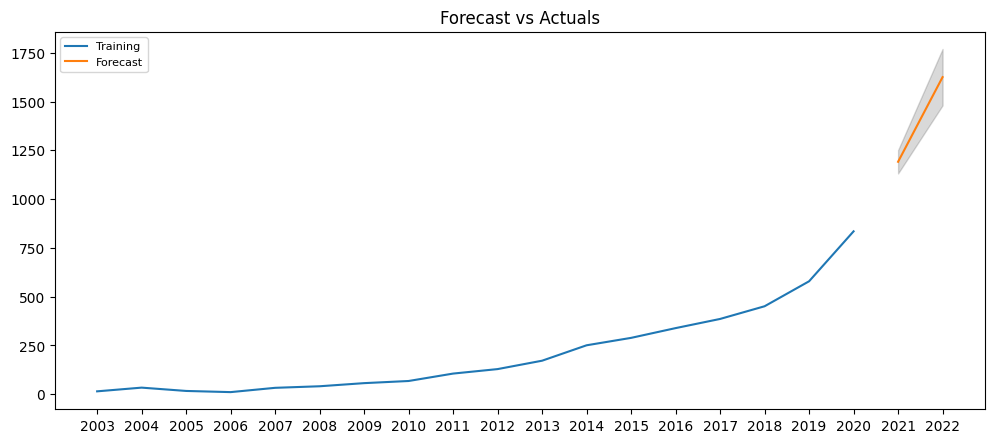

In [ ]:
# Plot the points and the prediction with its confidence interval

fc_series = pd.Series(fc, index=['2021','2022'])
lower_series = pd.Series(conf[:, 0], index=['2021','2022'])
upper_series = pd.Series(conf[:, 1], index=['2021','2022'])

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train_df.citation, label='Training')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Part III - Self-Reflective Essay

## Overview

Please check the assessment task specification details.
